# Data Exploration & Cleaning

##  Import Libraries and Load Data

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

print("All libraries imported successfully")
print(f"Python version: {sys.version.split()[0]}")
print(f"Current working directory: {os.getcwd()}")

# Load the marketing A/B test data
df = pd.read_csv('../data/marketing_AB.csv')
print(f"Dataset loaded successfully: {df.shape[0]} rows, {df.shape[1]} columns")

All libraries imported successfully
Python version: 3.9.23
Current working directory: /Users/mac/Desktop/ab_testing_dashboard/notebooks
Dataset loaded successfully: 588101 rows, 7 columns


##  Initial Data Inspection

In [2]:
# Display first few rows to understand the data structure
print("First look at the data:")
print(df.head())

print("\nColumn names in the dataset:")
print(df.columns.tolist())

print("\nBasic information about each column:")
print(df.info())

First look at the data:
   Unnamed: 0  user id test group  converted  total ads most ads day  \
0           0  1069124         ad      False        130       Monday   
1           1  1119715         ad      False         93      Tuesday   
2           2  1144181         ad      False         21      Tuesday   
3           3  1435133         ad      False        355      Tuesday   
4           4  1015700         ad      False        276       Friday   

   most ads hour  
0             20  
1             22  
2             18  
3             10  
4             14  

Column names in the dataset:
['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads', 'most ads day', 'most ads hour']

Basic information about each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        

## Data Quality Check

In [3]:
# Check for data quality issues
print("Checking for missing values:")
missing_values = df.isnull().sum()
print(missing_values)

print("\nChecking for duplicate rows:")
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicates if any exist
if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicate_count} duplicate rows")

Checking for missing values:
Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

Checking for duplicate rows:
Number of duplicate rows: 0


## Data Cleaning

In [4]:
# Clean column names for easier processing
print("Cleaning column names")
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]
print("New column names:", df.columns.tolist())

# Remove unnecessary index column
if 'unnamed:_0' in df.columns:
    df = df.drop('unnamed:_0', axis=1)
    print("Removed unnecessary index column: unnamed:_0")
#Convert boolean to integer
df['converted'] = df['converted'].astype(int)
print("Converted 'converted' column from boolean to integer (0/1)")

# Display basic statistics for numerical columns
print("\nBasic statistics for numerical columns:")
print(df.describe())

Cleaning column names
New column names: ['unnamed:_0', 'user_id', 'test_group', 'converted', 'total_ads', 'most_ads_day', 'most_ads_hour']
Removed unnecessary index column: unnamed:_0
Converted 'converted' column from boolean to integer (0/1)

Basic statistics for numerical columns:
            user_id      converted      total_ads  most_ads_hour
count  5.881010e+05  588101.000000  588101.000000  588101.000000
mean   1.310692e+06       0.025239      24.820876      14.469061
std    2.022260e+05       0.156850      43.715181       4.834634
min    9.000000e+05       0.000000       1.000000       0.000000
25%    1.143190e+06       0.000000       4.000000      11.000000
50%    1.313725e+06       0.000000      13.000000      14.000000
75%    1.484088e+06       0.000000      27.000000      18.000000
max    1.654483e+06       1.000000    2065.000000      23.000000


## Understanding Test Groups

In [5]:
# Analyze the distribution of test groups
print("Test group distribution:")
group_distribution = df['test_group'].value_counts()
print(group_distribution)

print("\nUnique values in each column:")
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"{column}: {unique_count} unique values")

Test group distribution:
test_group
ad     564577
psa     23524
Name: count, dtype: int64

Unique values in each column:
user_id: 588101 unique values
test_group: 2 unique values
converted: 2 unique values
total_ads: 807 unique values
most_ads_day: 7 unique values
most_ads_hour: 24 unique values


## Conversion Rate Analysis 

In [6]:
# Calculate conversion rates for each test group
print("Conversion rate analysis by test group:")
conversion_analysis = df.groupby('test_group').agg({
    'converted': ['count', 'sum', 'mean']
})

# Format the results for better readability
conversion_analysis.columns = ['total_users', 'conversions', 'conversion_rate']
conversion_analysis['conversion_percentage'] = (conversion_analysis['conversion_rate'] * 100).round(2)

print(conversion_analysis)

Conversion rate analysis by test group:
            total_users  conversions  conversion_rate  conversion_percentage
test_group                                                                  
ad               564577        14423         0.025547                   2.55
psa               23524          420         0.017854                   1.79


## Initial Visualizations

Creating initial visualizations


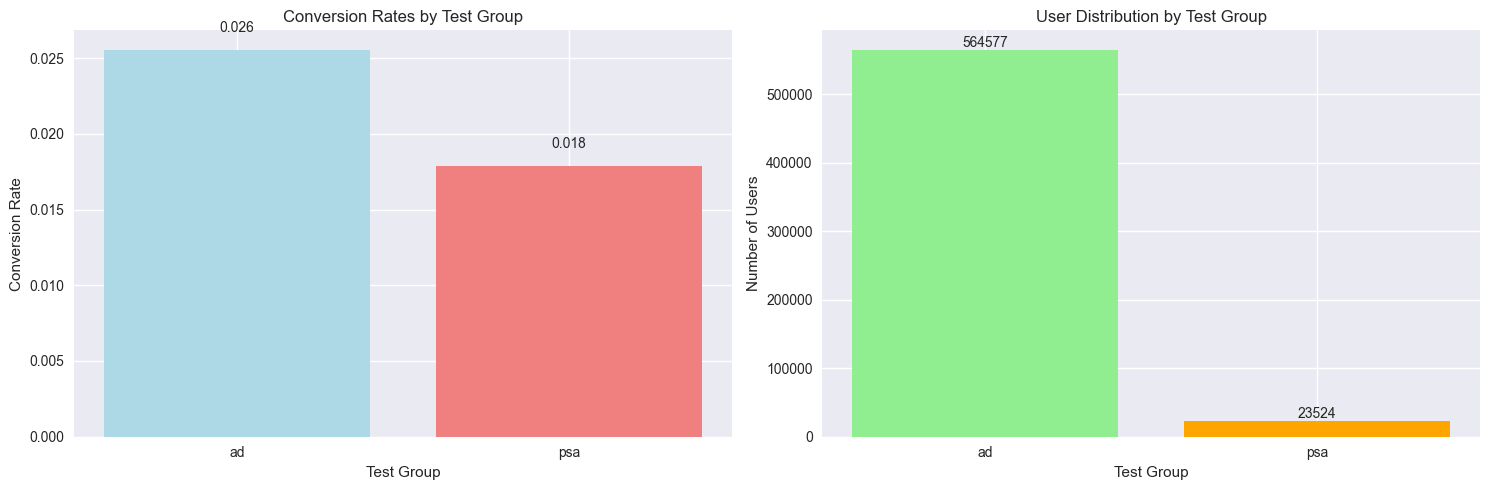


Summary Statistics:
Total users in experiment: 588,101
Total conversions: 14,843
Overall conversion rate: 2.52%


In [7]:
# Create visualizations to understand the data
print("Creating initial visualizations")

# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Conversion rates by test group
conversion_rates = df.groupby('test_group')['converted'].mean()
axes[0].bar(conversion_rates.index, conversion_rates.values, color=['lightblue', 'lightcoral'])
axes[0].set_title('Conversion Rates by Test Group')
axes[0].set_ylabel('Conversion Rate')
axes[0].set_xlabel('Test Group')

# Add value labels on bars
for i, v in enumerate(conversion_rates.values):
    axes[0].text(i, v + 0.001, f'{v:.3f}', ha='center', va='bottom')

# Plot 2: User distribution by test group
group_counts = df['test_group'].value_counts()
axes[1].bar(group_counts.index, group_counts.values, color=['lightgreen', 'orange'])
axes[1].set_title('User Distribution by Test Group')
axes[1].set_ylabel('Number of Users')
axes[1].set_xlabel('Test Group')

# Add value labels on bars
for i, v in enumerate(group_counts.values):
    axes[1].text(i, v + 50, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print summary statistics
total_users = len(df)
total_conversions = df['converted'].sum()
overall_conversion_rate = (total_conversions / total_users) * 100

print(f"\nSummary Statistics:")
print(f"Total users in experiment: {total_users:,}")
print(f"Total conversions: {total_conversions:,}")
print(f"Overall conversion rate: {overall_conversion_rate:.2f}%")

##  Save Cleaned Data

In [8]:
df.to_csv('../data/marketing_AB_cleaned.csv', index=False)
print("Cleaned data saved to '../data/marketing_AB_cleaned.csv'")

Cleaned data saved to '../data/marketing_AB_cleaned.csv'
